In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [62]:
# Auto Insurance Data
df = pd.DataFrame({
    'MaleAR': [
        132,
        95,
        73,
        65,
        53,
        51,
        50,
        47,
        47,
        38,
        42,
        47,
        48
    ],
    'FemaleAR': [
        72,
        50,
        38,
        36,
        41,
        33,
        36,
        25,
        27,
        30,
        19,
        32,
        35
    ]
}, columns=['MaleAR', 'FemaleAR'])

df.index = [
        'Under 20',
        '20-24',
        '25-29',
        '30-34',
        '35-39',
        '40-44',
        '45-49',
        '50-54',
        '55-59',
        '60-64',
        '65-69',
        '70-74',
        '75 & Over'
    ]
df

,MaleAR,FemaleAR
Under 20,132,72
20-24,95,50
25-29,73,38
30-34,65,36
35-39,53,41
40-44,51,33
45-49,50,36
50-54,47,25
55-59,47,27
60-64,38,30


In [63]:
# Insurance Premium Form (avg cost * rate) / exposure units
df['MalePP'] = (df.MaleAR * 5000) / 1000
df['FemalePP'] = (df.FemaleAR * 5000) / 1000
df

,MaleAR,FemaleAR,MalePP,FemalePP
Under 20,132,72,660.0,360.0
20-24,95,50,475.0,250.0
25-29,73,38,365.0,190.0
30-34,65,36,325.0,180.0
35-39,53,41,265.0,205.0
40-44,51,33,255.0,165.0
45-49,50,36,250.0,180.0
50-54,47,25,235.0,125.0
55-59,47,27,235.0,135.0
60-64,38,30,190.0,150.0


In [64]:
# Gross Premium Formula (pure premium + expenses + cost per claim) / (1 - (tax + risk))
df['MaleGP']= ((df.MalePP + 20 + 12 + df.MaleAR * 0.01) / (1 - 0.2)).round()
df['FemaleGP']= ((df.FemalePP + 20 + 12 + df.FemaleAR * 0.01) / (1 - 0.2)).round()
df

,MaleAR,FemaleAR,MalePP,FemalePP,MaleGP,FemaleGP
Under 20,132,72,660.0,360.0,867.0,491.0
20-24,95,50,475.0,250.0,635.0,353.0
25-29,73,38,365.0,190.0,497.0,278.0
30-34,65,36,325.0,180.0,447.0,265.0
35-39,53,41,265.0,205.0,372.0,297.0
40-44,51,33,255.0,165.0,359.0,247.0
45-49,50,36,250.0,180.0,353.0,265.0
50-54,47,25,235.0,125.0,334.0,197.0
55-59,47,27,235.0,135.0,334.0,209.0
60-64,38,30,190.0,150.0,278.0,228.0


In [65]:
# Standard Deviation Formula sqrt(AR * (1 - AR) * 1000)
df['MaleSTD'] = (np.sqrt(df['MaleAR']/1000 * (1 - df['MaleAR']/1000) * 1000)).round(4)
df['FemaleSTD'] = (np.sqrt(df['FemaleAR']/1000 * (1 - df['FemaleAR']/1000) * 1000)).round(4)
df

,MaleAR,FemaleAR,MalePP,FemalePP,MaleGP,FemaleGP,MaleSTD,FemaleSTD
Under 20,132,72,660.0,360.0,867.0,491.0,10.7040,8.1741
20-24,95,50,475.0,250.0,635.0,353.0,9.2723,6.8920
25-29,73,38,365.0,190.0,497.0,278.0,8.2262,6.0462
30-34,65,36,325.0,180.0,447.0,265.0,7.7958,5.8910
35-39,53,41,265.0,205.0,372.0,297.0,7.0846,6.2705
40-44,51,33,255.0,165.0,359.0,247.0,6.9569,5.6490
45-49,50,36,250.0,180.0,353.0,265.0,6.8920,5.8910
50-54,47,25,235.0,125.0,334.0,197.0,6.6926,4.9371
55-59,47,27,235.0,135.0,334.0,209.0,6.6926,5.1255
60-64,38,30,190.0,150.0,278.0,228.0,6.0462,5.3944


## Problem 3 - Simulation

## Relative probability distribution formula

Mean: 5204.724157250431
STD: 5139.615745869738


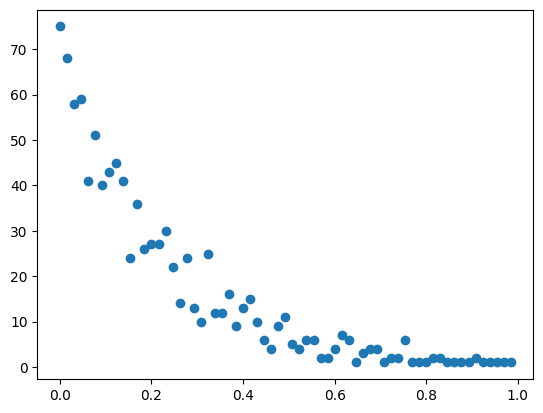

In [157]:
# severity model - gamma(alpha, 1/beta, size)
severity = np.random.gamma(1, 1/0.0002, 1000)
m = max(severity)
dist = [x/m for x in severity]
dist.sort()
pdf = [0]*100
for l in range(0, 100):
    for x in dist:
        if x < l/100 and x >= (l-1)/100:
            pdf[l] += 1
for x in range(99, -1, -1):
    if pdf[x]==0:
        pdf.pop(x)
plt.scatter([x/len(pdf) for x in range(len(pdf))], pdf)
print("Mean: " + str(severity.mean()))
print("STD: " + str(severity.std()))

(array([515., 273., 118.,  49.,  26.,  12.,   2.,   2.,   2.,   1.]),
 array([5.71174562e+00, 3.95023704e+03, 7.89476233e+03, 1.18392876e+04,
        1.57838129e+04, 1.97283382e+04, 2.36728635e+04, 2.76173888e+04,
        3.15619141e+04, 3.55064394e+04, 3.94509646e+04]),
 <BarContainer object of 10 artists>)

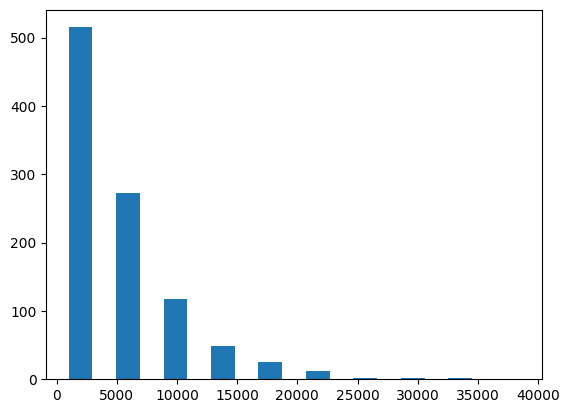

In [152]:
plt.hist(severity, rwidth=0.5)


(array([ 19.,  50., 144., 183., 258., 176., 104.,  41.,  22.,   3.]),
 array([103. , 109.5, 116. , 122.5, 129. , 135.5, 142. , 148.5, 155. ,
        161.5, 168. ]),
 <BarContainer object of 10 artists>)

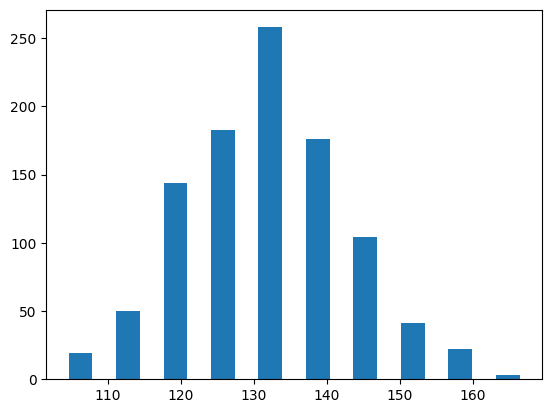

In [166]:
# Model frequency

#frequency = np.random.binomial(1000, 132/1000, 1000)
def bin_pdf(n, p):
    return